In [3]:
import fsps
import time
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

In [8]:
from ChangTools.plotting import prettyplot
from ChangTools.plotting import prettycolors 
prettyplot() 
pretty_colors = prettycolors()

# Vanilla run
Simplest thing with nothing specified.

124.143360853  seconds


(1000, 10000)

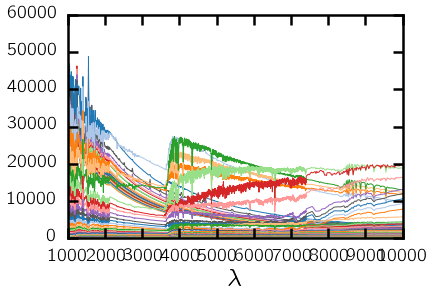

In [7]:
t_start = time.time()
sps = fsps.StellarPopulation(zcontinuous=1) 
spec = sps.get_spectrum() 
print time.time()-t_start, ' seconds'    # takes ~2 mins... wtf
    
fig = plt.figure() 
sub = fig.add_subplot(111)
for i in range(spec[1].shape[0]): 
    sub.plot(spec[0], 1.e17*(spec[1][i,:]), c=pretty_colors[i % 10])

sub.set_xlabel(r'$\lambda$', fontsize=25)
sub.set_xlim([1000, 10000])

0.0132780075073  seconds
0.0131800174713  seconds
0.0130591392517  seconds
0.0127279758453  seconds
0.0130209922791  seconds
0.0156850814819  seconds
0.0135688781738  seconds


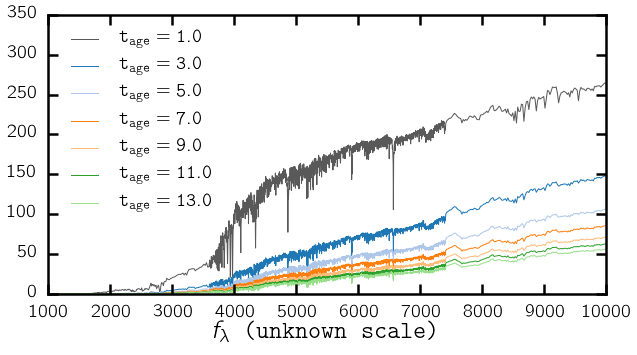

In [12]:
#t_start = time.time() 
#sps = fsps.StellarPopulation(zcontinuous=1) 
#print time.time()-t_start, ' seconds'    # takes 3 mins... wtf

prettyplot() 
pretty_colors = prettycolors()
fig = plt.figure(figsize=[10,5]) 
sub = fig.add_subplot(111)
for i, tage in enumerate(np.arange(1., 15., 2.)):
    t_start = time.time() 
    wave, spec = sps.get_spectrum(tage=tage) 
    sub.plot(wave, 1.e17*spec, c=pretty_colors[i], label=r'$\mathtt{t_{age} = '+str(tage)+'}$')
    print time.time()-t_start, ' seconds'    # takes 3 mins... wtf
sub.set_xlabel(r'$\lambda$', fontsize=25)
sub.set_xlim([1000, 10000])
sub.set_xlabel(r'$f_\lambda$ (unknown scale)', fontsize=25)
sub.legend(loc='upper left') 